In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_img(image):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image)
    ax.xaxis.tick_top()

In [3]:
img = cv2.imread("addedLane_1323813414.avi_image0.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

zeros_img = np.full((img.shape[0], img.shape[1], 1), fill_value = 255, dtype=np.uint8)
img = np.concatenate((img, zeros_img), axis=2)

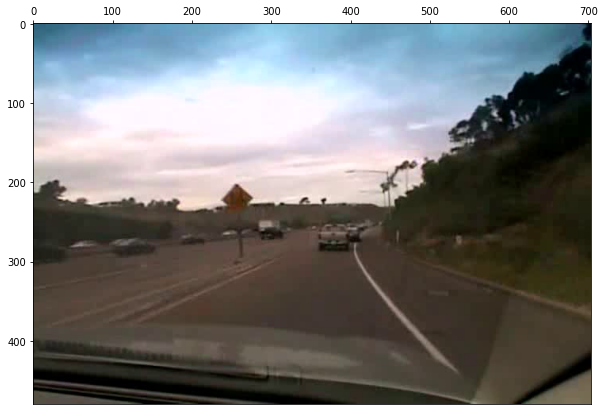

In [4]:
display_img(img)

In [5]:
glare1 = cv2.imread("glare.png", cv2.IMREAD_UNCHANGED)
glare2 = cv2.imread("glare2.png", cv2.IMREAD_UNCHANGED)
glare3 = cv2.imread("glare3.png", cv2.IMREAD_UNCHANGED)
glare4 = cv2.imread("glare4.png", cv2.IMREAD_UNCHANGED)

glares = [glare1, glare2, glare3, glare4]
glare_grayscale = []

In [6]:
for glare in glares:

    glare_alpha = glare[:, :, 3]
    glare_alpha = np.reshape(glare_alpha, (glare_alpha.shape[0], glare_alpha.shape[1], 1))

    temp = cv2.cvtColor(glare, cv2.COLOR_BGR2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_GRAY2RGB)
    temp = np.concatenate((temp, glare_alpha), axis=2)
    glare_grayscale.append(temp)
    

[251 251 251 242]


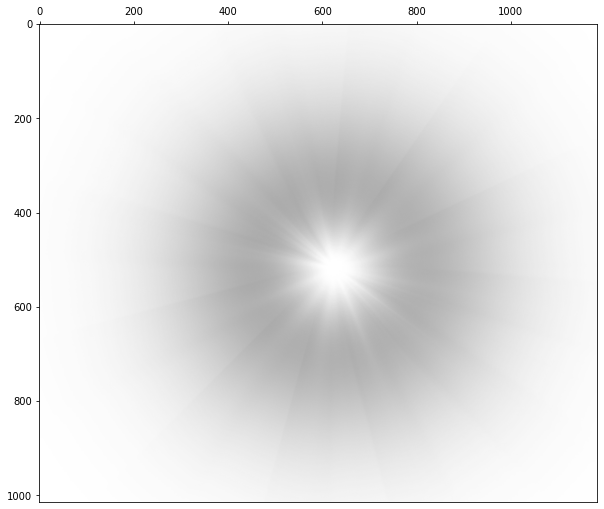

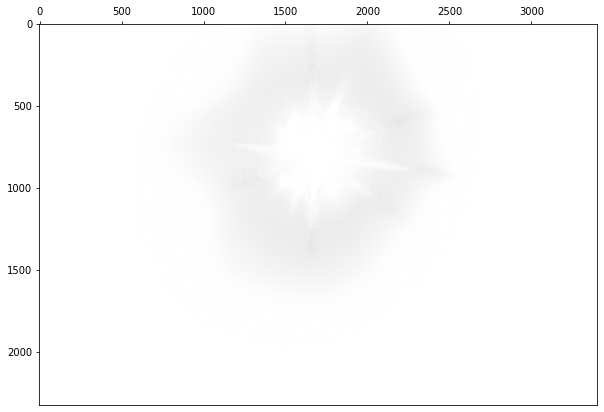

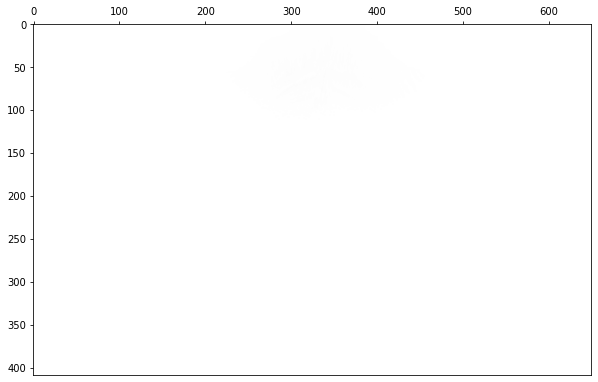

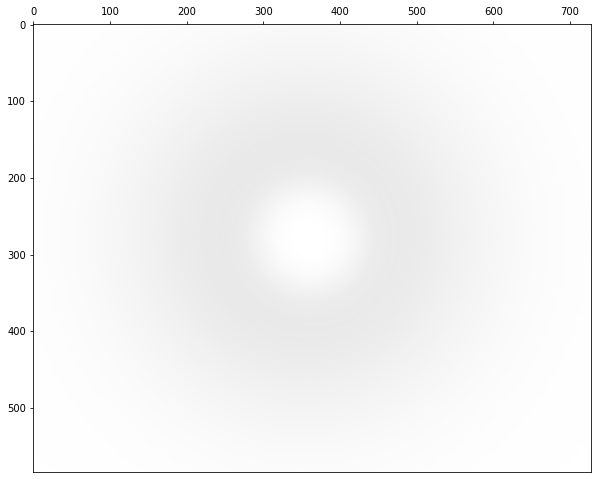

In [7]:
for glare in glare_grayscale:
    display_img(glare)

In [8]:
glare_resized = []
for glare in glare_grayscale:
    glare_resized.append(cv2.resize(glare, (img.shape[1]*2, img.shape[0]*2)))

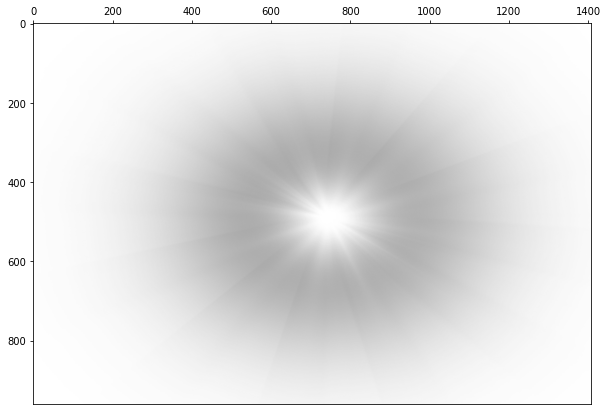

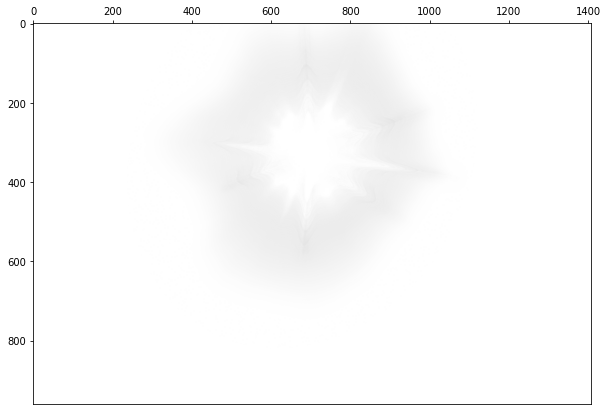

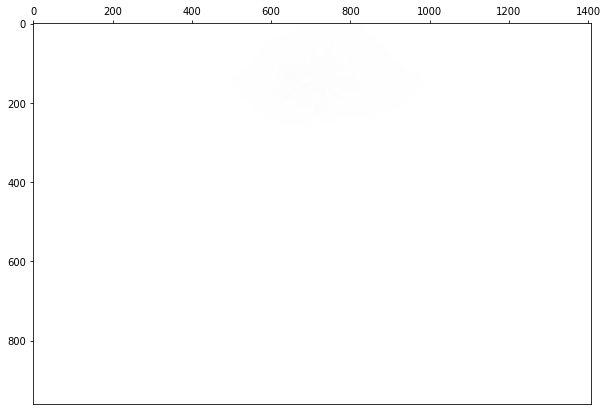

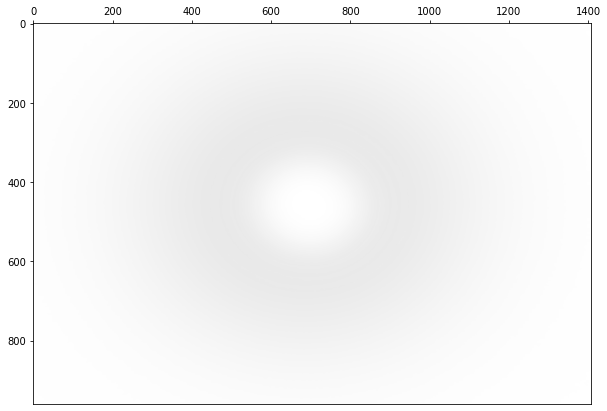

In [9]:
for glare in glare_resized:
    display_img(glare)

In [10]:
glare_moved = []
for glare in glare_resized:
    tx = np.random.randint(img.shape[1] * 0.2, img.shape[1] * 0.8)
    ty = np.random.randint(img.shape[0]/2, img.shape[0] * 0.7)

    glare_moved.append(glare[ty:ty+img.shape[0], tx:tx+img.shape[1]])

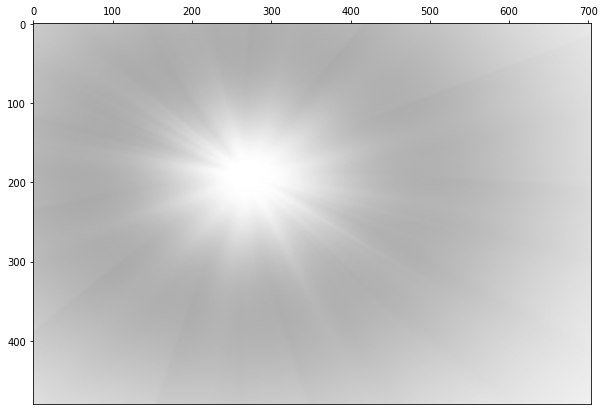

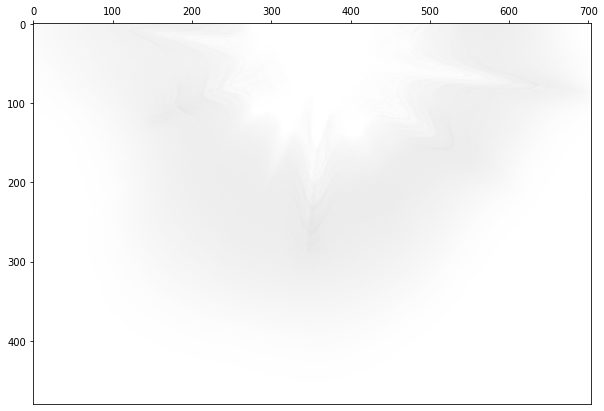

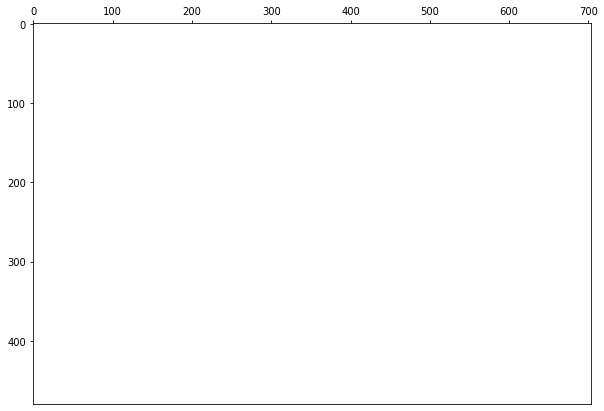

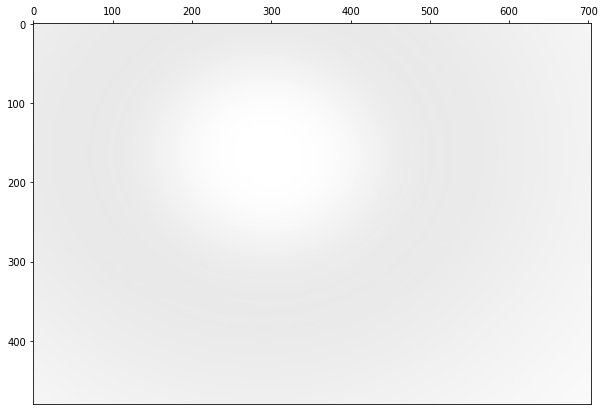

In [11]:
for glare in glare_moved:
    display_img(glare)

In [12]:
glare_added = []
gamma = 1
for glare in glare_moved:
    background = img.copy()
    foreground = glare.copy()

    alpha_background = background[:, :, 3] / 255.0
    alpha_foreground = gamma * foreground[:, :, 3] / 255.0

    for color in range(3):
        background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
        alpha_background * background[:,:,color] * (1 - alpha_foreground)

    background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255
    glare_added.append(background)

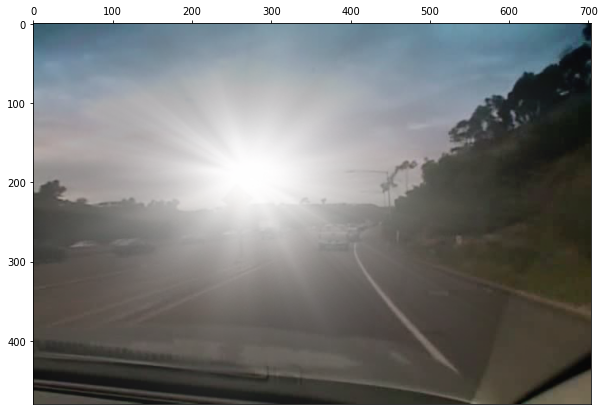

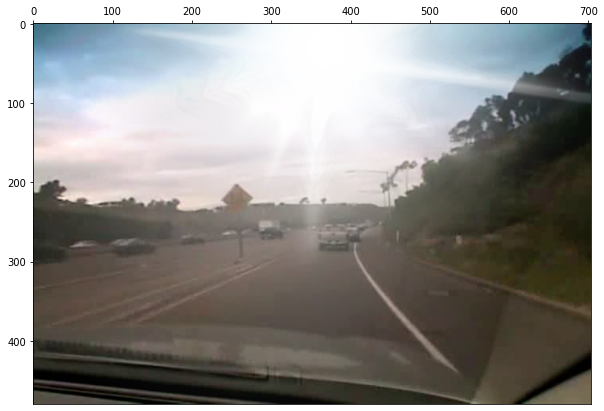

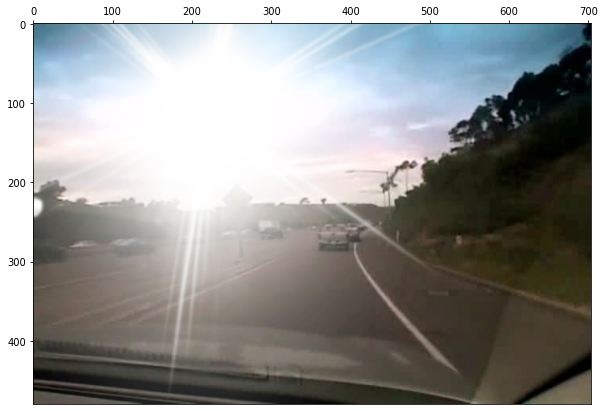

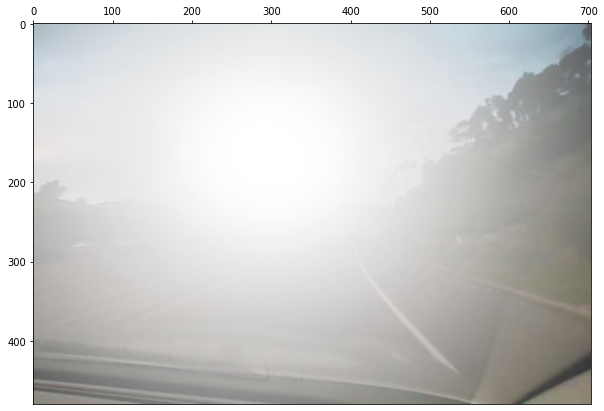

In [13]:
for glare in glare_added:
    display_img(glare)

# Let's try without resizing for glare images 2 and 3

In [14]:
glare2_v2 = cv2.imread("glare2.png", cv2.IMREAD_UNCHANGED)
glare3_v2 = cv2.imread("glare3.png", cv2.IMREAD_UNCHANGED)

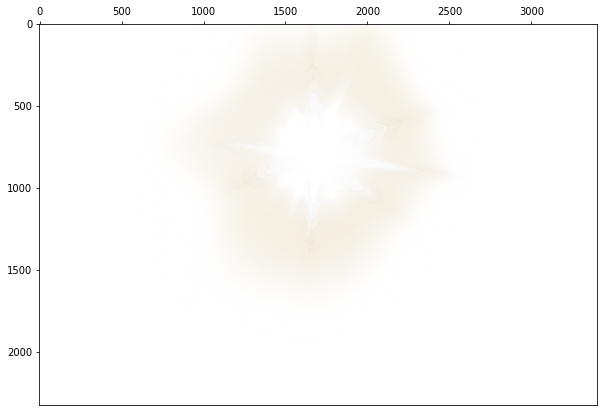

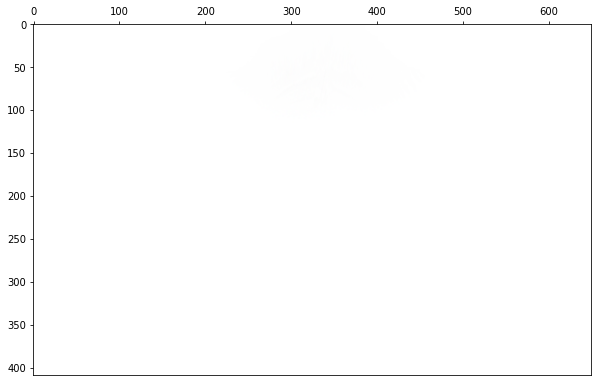

In [15]:
display_img(glare2_v2)
display_img(glare3_v2)

In [16]:
glare2_alpha = glare2_v2[:, :, 3]
glare2_alpha = np.reshape(glare2_alpha, (glare2_alpha.shape[0], glare2_alpha.shape[1], 1))

glare2_v2 = cv2.cvtColor(glare2_v2, cv2.COLOR_BGR2GRAY)
glare2_v2 = cv2.cvtColor(glare2_v2, cv2.COLOR_GRAY2RGB)
glare2_v2 = np.concatenate((glare2_v2, glare2_alpha), axis=2)

glare3_alpha = glare3_v2[:, :, 3]
glare3_alpha = np.reshape(glare3_alpha, (glare3_alpha.shape[0], glare3_alpha.shape[1], 1))

glare3_v2 = cv2.cvtColor(glare3_v2, cv2.COLOR_BGR2GRAY)
glare3_v2 = cv2.cvtColor(glare3_v2, cv2.COLOR_GRAY2RGB)
glare3_v2 = np.concatenate((glare3_v2, glare3_alpha), axis=2)

In [17]:
display_img(glare2_v2)
display_img(glare3_v2)

In [ ]:
glare2_v2 = cv2.resize(glare2_v2, (img.shape[1], img.shape[0]))
glare3_v2 = cv2.resize(glare3_v2, (img.shape[1], img.shape[0]))

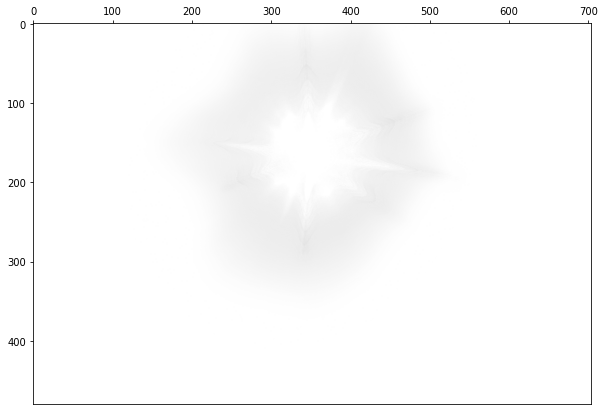

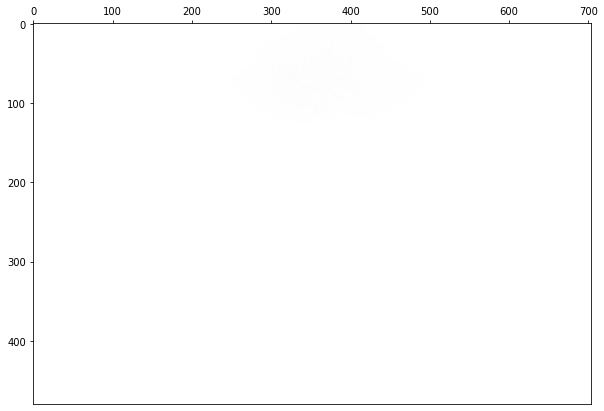

In [ ]:
display_img(glare2_v2)
display_img(glare3_v2)

In [ ]:
# Translate images using warpaffine
height, width = glare2_v2.shape[:2]
tx = np.random.randint(img.shape[1] * -0.4, img.shape[1] * 0.4)
ty = np.random.randint(img.shape[0] * -0.2, img.shape[0] * 0.1)
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

glare2_translated = cv2.warpAffine(glare2_v2, translation_matrix, (width, height))

tx = np.random.randint(img.shape[1] * -0.4, img.shape[1] * 0.4)
ty = np.random.randint(img.shape[0] * -0.2, img.shape[0] * 0.1)
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

glare3_translated = cv2.warpAffine(glare3_v2, translation_matrix, (width, height))

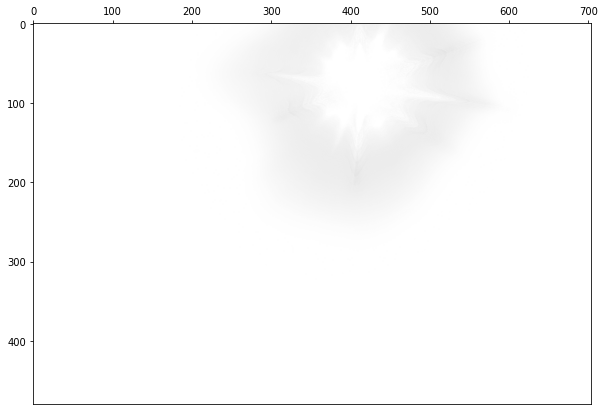

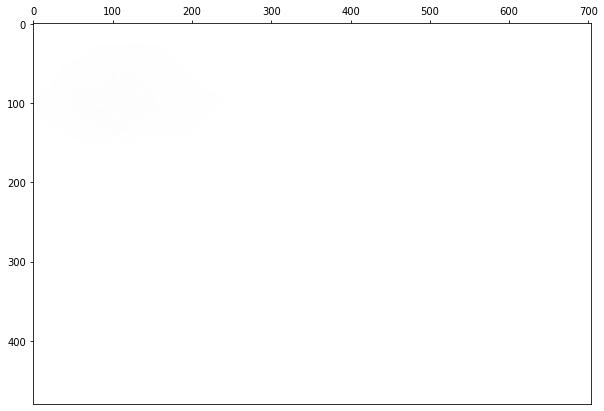

In [ ]:
display_img(glare2_translated)
display_img(glare3_translated)

In [ ]:
glarev2_added = []
gamma = 1
for glare in (glare2_translated, glare3_translated):
    background = img.copy()
    foreground = glare.copy()

    alpha_background = background[:, :, 3] / 255.0
    alpha_foreground = gamma * foreground[:, :, 3] / 255.0

    for color in range(3):
        background[:,:,color] = alpha_foreground * foreground[:,:,color] + \
        alpha_background * background[:,:,color] * (1 - alpha_foreground)

    background[:,:,3] = (1 - (1 - alpha_foreground) * (1 - alpha_background)) * 255
    glarev2_added.append(background)

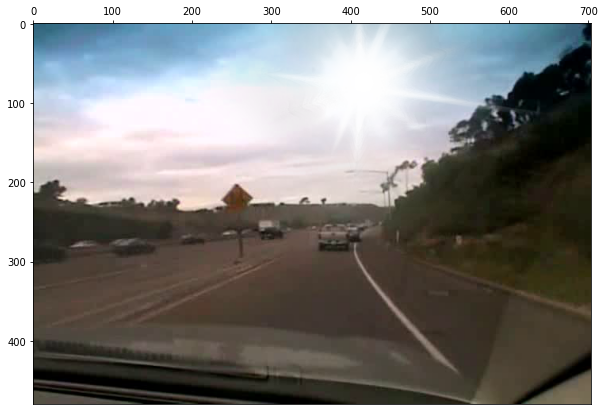

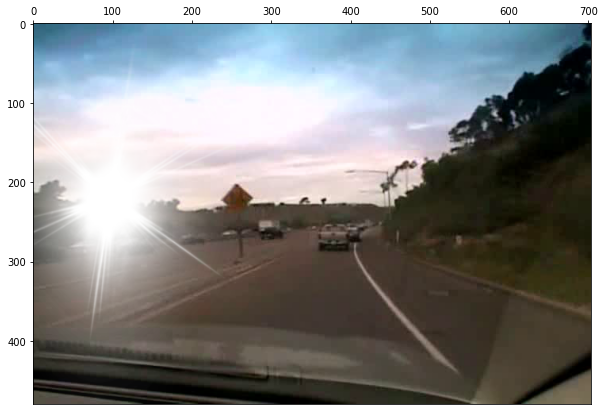

In [ ]:
for glare in glarev2_added:
    display_img(glare)